<a href="https://colab.research.google.com/github/taufiqyfirdaus/Machine_Learning/blob/main/Kuis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Taufiqy Firdaus Jatu

Kelas : 3G

NIM   : 2141720124

Absen : 21

# New Section

In [1]:
%pip install torch torchvision numpy matplotlib pandas

In [2]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Mendownload dataset MNIST dengan torchvision
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 134463066.53it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 55313102.20it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 43093693.47it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 7687864.72it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [22]:
# Mengekstrak data dan label
data = mnist_dataset.data
labels = mnist_dataset.targets

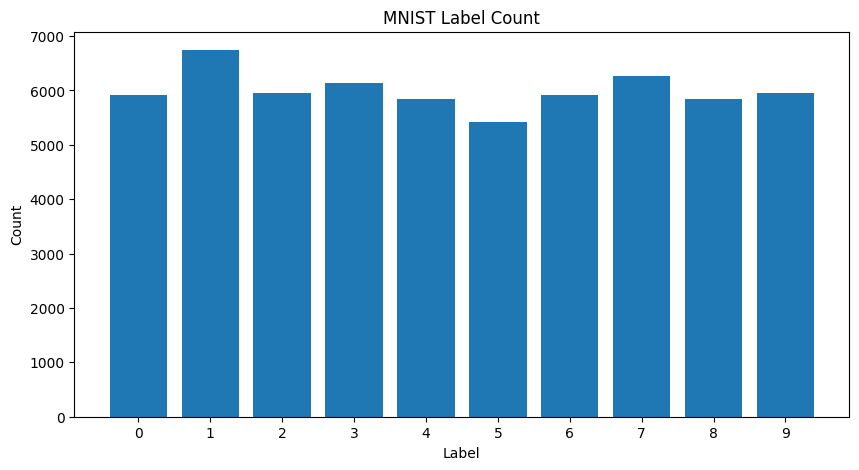

In [23]:
# 1. Memastikan jumlah data setiap label angka (0-9).
label_counts = torch.bincount(labels)

# Visualisasi
plt.figure(figsize=(10, 5))
plt.bar(range(10), label_counts)
plt.xticks(range(10), [str(i) for i in range(10)])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('MNIST Label Count')
plt.show()

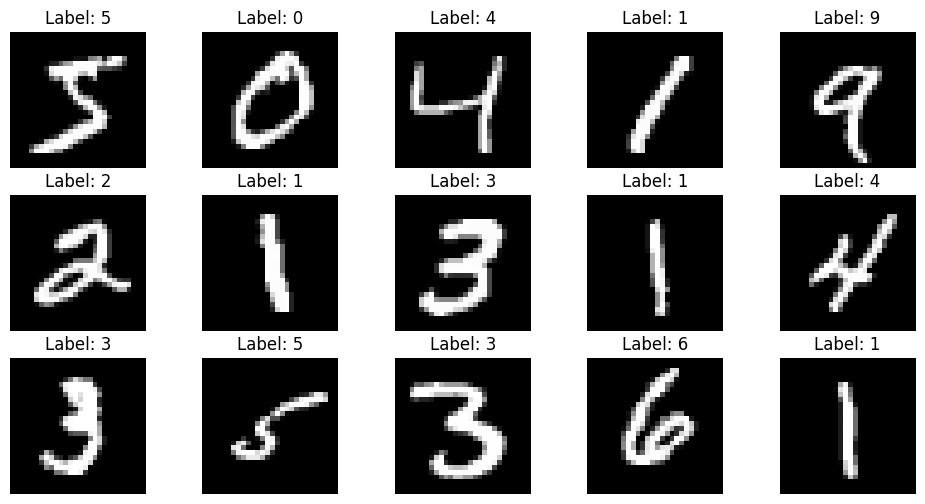

In [29]:
# 2. Menampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya.
plt.figure(figsize=(12, 6))

for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(data[i], cmap='gray')
    plt.title(f"Label: {labels[i].item()}")
    plt.axis('off')
plt.show()

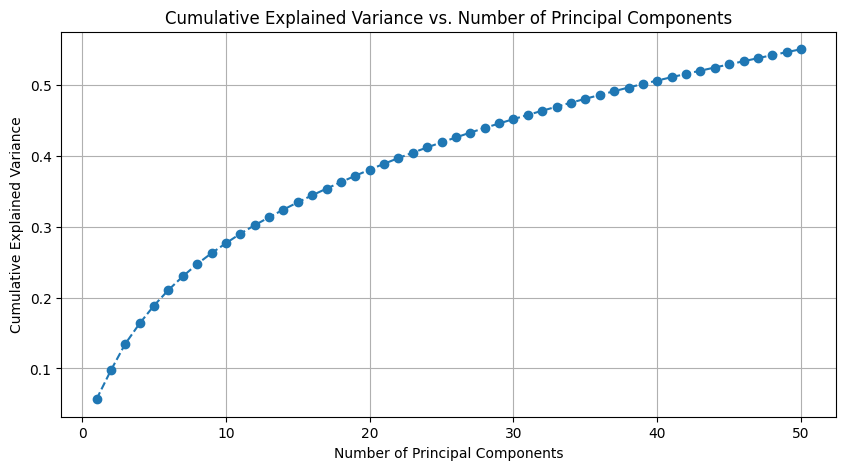

In [7]:
# 3. Melakukan proses ekstraksi fitur pada data MNIST.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Mengubah bentuk matriks data
data = data.reshape(data.shape[0], -1)
# Standarisasi data
scaler = StandardScaler()
data_std = scaler.fit_transform(data)
# Melakukan reduksi dimensi menggunakan Principal Component Analysis (PCA)
n_components = 50
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_std)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 5))
plt.plot(range(1, n_components + 1),
         cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid()
plt.show()

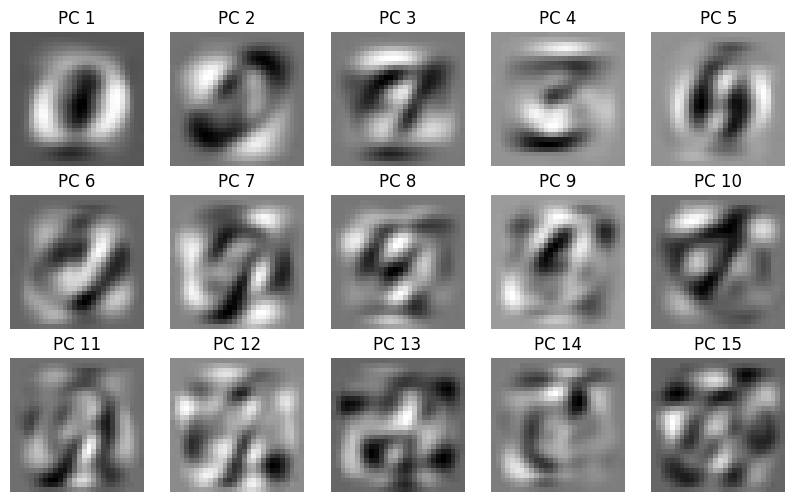

In [8]:
# Visualisasi 15 citra pertama
fig, ax = plt.subplots(3, 5, figsize=(10, 6))
for i in range(15):
    axi = ax[i // 5, i % 5]
    eigendigit = pca.components_[i].reshape(28, 28)
    axi.imshow(eigendigit, cmap='gray')
    axi.set_title(f'PC {i + 1}')
    axi.axis('off')
plt.show()

In [9]:
# 4. Memisahkan data untuk testing dan training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_pca, labels, test_size=0.3)
X1_train, X1_test, y1_train, y1_test = train_test_split(
    data_pca, labels, test_size=0.2)
X2_train, X2_test, y2_train, y2_test = train_test_split(
    data_pca, labels, test_size=0.1)

# Verifikasi bentuk dari set training dan testing
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (42000, 50)
y_train shape: torch.Size([42000])
X_test shape: (18000, 50)
y_test shape: torch.Size([18000])


In [10]:
# 5, 6, 7 fit your data (using linear kernel) (SVM)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

linear_model = SVC(kernel='linear')

# Fit the SVM model to the training data
linear_model.fit(X_train, y_train)

# Predict labels on the test data
y_pred = linear_model.predict(X_test)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', confusion_mtx)

Accuracy: 92.66%
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1812
           1       0.95      0.98      0.97      2012
           2       0.92      0.91      0.91      1782
           3       0.90      0.90      0.90      1783
           4       0.93      0.94      0.93      1782
           5       0.89      0.89      0.89      1622
           6       0.96      0.96      0.96      1787
           7       0.94      0.93      0.94      1892
           8       0.90      0.88      0.89      1704
           9       0.91      0.91      0.91      1824

    accuracy                           0.93     18000
   macro avg       0.93      0.93      0.93     18000
weighted avg       0.93      0.93      0.93     18000

Confusion Matrix:
 [[1756    0    7    6    3   19   10    2    7    2]
 [   0 1966   14    3    5    3    1    2   13    5]
 [  20   16 1616   28   23    6   19   18   30    6]
 [   7   16   30 1597 

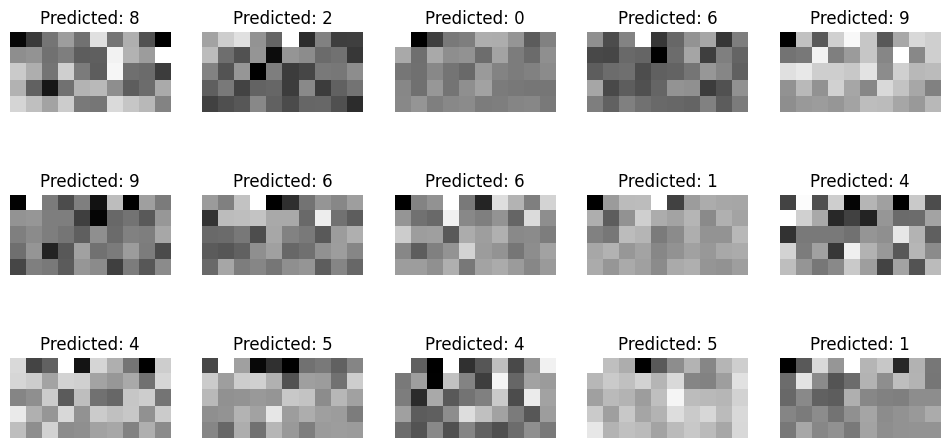

In [12]:
# Visualize a few example predictions
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Predicted: {y_pred[i]}')
    plt.axis('off')

plt.show()

In [13]:
# 5, 6, 7 fit your data (using rbf kernel) (SVM)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rbf_model = SVC(kernel='rbf')

# Fit the SVM model to the training data
rbf_model.fit(X_train, y_train)

# Predict labels on the test data
y_pred = rbf_model.predict(X_test)

In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', confusion_mtx)

Accuracy: 96.84%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1812
           1       0.98      0.98      0.98      2012
           2       0.96      0.96      0.96      1782
           3       0.96      0.95      0.96      1783
           4       0.97      0.96      0.97      1782
           5       0.97      0.97      0.97      1622
           6       0.98      0.98      0.98      1787
           7       0.96      0.97      0.96      1892
           8       0.96      0.95      0.95      1704
           9       0.95      0.96      0.96      1824

    accuracy                           0.97     18000
   macro avg       0.97      0.97      0.97     18000
weighted avg       0.97      0.97      0.97     18000

Confusion Matrix:
 [[1791    2    4    2    0    3    5    1    4    0]
 [   0 1977   15    4    4    1    1    4    0    6]
 [   7    4 1719   13    4    3    4   17   11    0]
 [   2    7    8 1694 

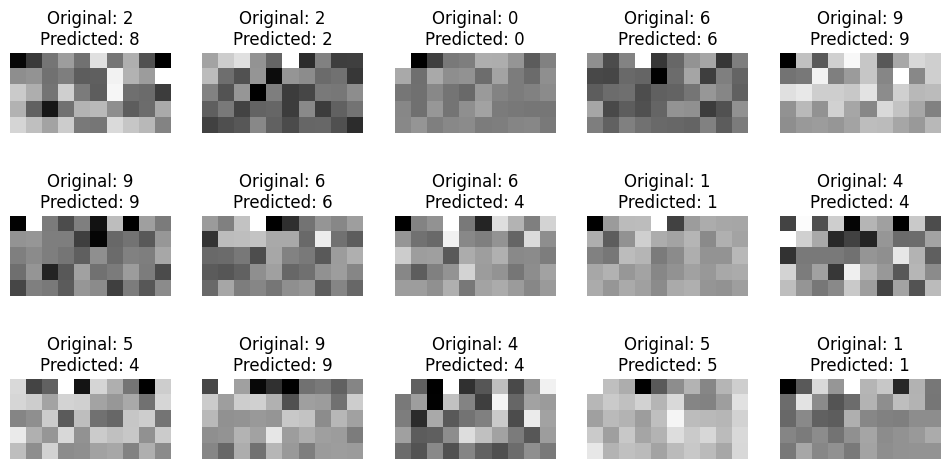

In [15]:
# Visualize a few example predictions
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred[i]}')
    plt.axis('off')

plt.show()

In [16]:
# 5, 6, 7 fit your data (using polynomial kernel)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

poly_model = SVC(kernel='poly', degree=3)

# Fit the SVM model to the training data
poly_model.fit(X_train, y_train)

# Predict labels on the test data
y_pred = poly_model.predict(X_test)

In [17]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', confusion_mtx)

Accuracy: 96.32%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1812
           1       0.98      0.98      0.98      2012
           2       0.97      0.95      0.96      1782
           3       0.96      0.93      0.95      1783
           4       0.96      0.97      0.96      1782
           5       0.97      0.97      0.97      1622
           6       0.98      0.98      0.98      1787
           7       0.97      0.96      0.97      1892
           8       0.90      0.96      0.93      1704
           9       0.95      0.95      0.95      1824

    accuracy                           0.96     18000
   macro avg       0.96      0.96      0.96     18000
weighted avg       0.96      0.96      0.96     18000

Confusion Matrix:
 [[1769    1    4    2    4    6    9    1   16    0]
 [   0 1977   12    3    4    0    1    1    7    7]
 [   7    3 1700    9    9    3    4    9   36    2]
 [   3    5   11 1667 

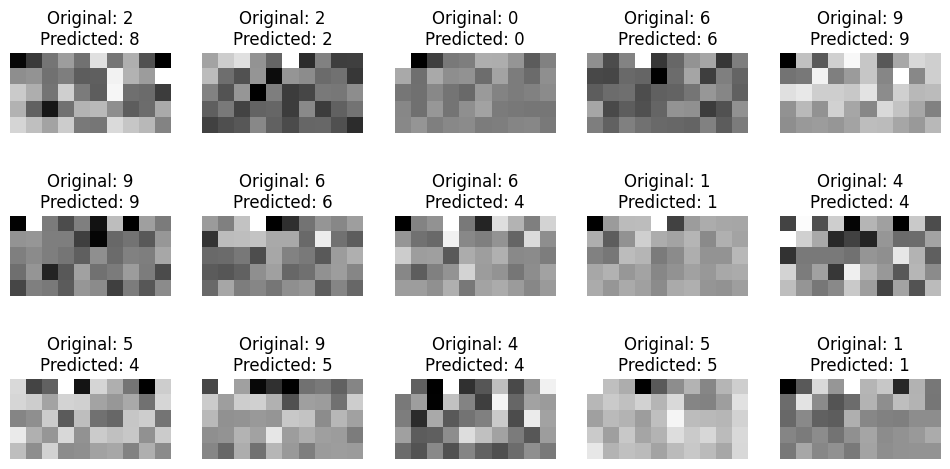

In [18]:
# Visualize a few example predictions
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred[i]}')
    plt.axis('off')

plt.show()

In [19]:
# 5, 6, 7 fit your data (using sigmoid kernel)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sigmoid_model = SVC(kernel='sigmoid', degree=3)

# Fit the SVM model to the training data
sigmoid_model.fit(X_train, y_train)

# Predict labels on the test data
y_pred = sigmoid_model.predict(X_test)

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', confusion_mtx)

Accuracy: 78.98%
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.85      0.78      1812
           1       0.90      0.94      0.92      2012
           2       0.75      0.73      0.74      1782
           3       0.78      0.79      0.79      1783
           4       0.83      0.79      0.81      1782
           5       0.69      0.68      0.68      1622
           6       0.84      0.81      0.82      1787
           7       0.81      0.81      0.81      1892
           8       0.83      0.72      0.77      1704
           9       0.73      0.75      0.74      1824

    accuracy                           0.79     18000
   macro avg       0.79      0.79      0.79     18000
weighted avg       0.79      0.79      0.79     18000

Confusion Matrix:
 [[1537    0   43   15    6  142   31    9   22    7]
 [   0 1896   41   19    5   11    2   11   23    4]
 [  97   43 1304   63   27   24  132   23   35   34]
 [  44   25   63 1405 

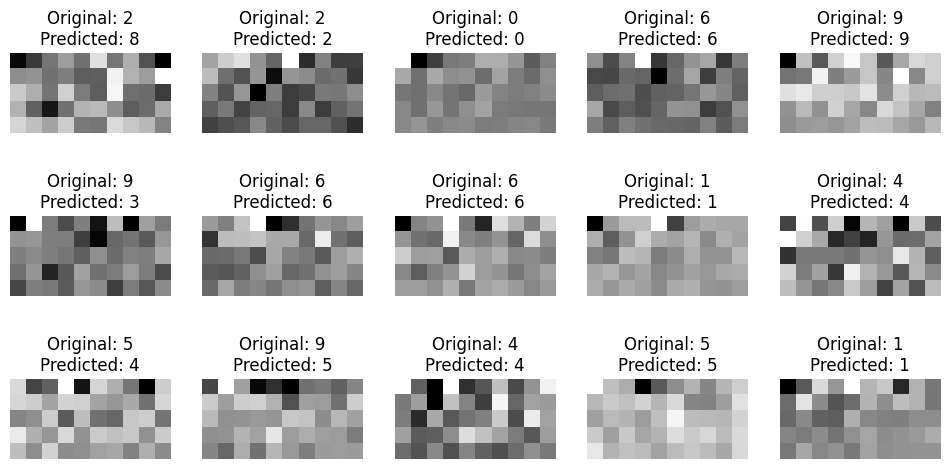

In [21]:
# Visualize a few example predictions
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred[i]}')
    plt.axis('off')

plt.show()